In [260]:
import pandas as pd
import numpy
import os
import matplotlib.pyplot as plt

%matplotlib inline

names_path = os.getcwd() + '/names/yob'

In [261]:
def get_names_dynamics(names, fromYear=1880, toYear=2016):
    source_cols = ['Name','Gender','Count']
    result_cols = ['Name', 'Year', 'Count']
    result = pd.DataFrame(columns=result_cols)
    for year in range(fromYear, toYear + 1):
        year_to_check = pd.read_csv(names_path + str(year) + '.txt', names=source_cols)
        for name in names:
            count = year_to_check.loc[year_to_check['Name'] == name]['Count'].sum()
            to_add = pd.DataFrame([[name, year, count]], columns=result_cols)
            result = result.append(to_add)
    return result

In [262]:
data = get_names_dynamics(['Ruth', 'Robert'], 1900, 2000)
data.head(10)

,Name,Year,Count
0,Ruth,1900,4781
0,Robert,1900,3845
0,Ruth,1901,3989
0,Robert,1901,2559
0,Ruth,1902,4401
0,Robert,1902,3201
0,Ruth,1903,4531
0,Robert,1903,3057
0,Ruth,1904,4915
0,Robert,1904,3427


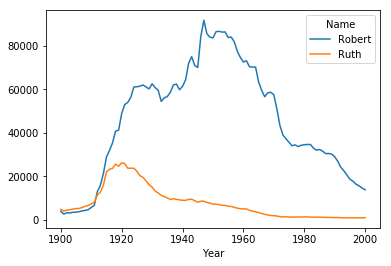

In [263]:
chart = data.pivot(index='Year', columns='Name', values='Count')
chart.plot()

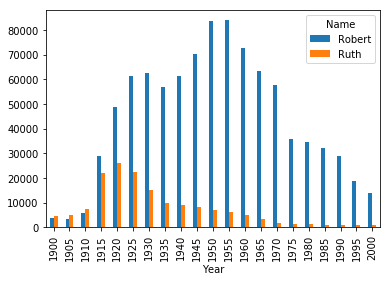

In [264]:
in_5_years = data[data['Year'] % 5 == 0]
chart = in_5_years.pivot(index='Year', columns='Name', values='Count')
chart.plot.bar()

In [265]:
def get_from_letter(letter, year=1950):
    source_cols = ['Name','Gender','Count']
    year_to_check = pd.read_csv(names_path + str(year) + '.txt', names=source_cols)
    return year_to_check[year_to_check['Name'].str.startswith(letter)]

In [266]:
fromR = get_from_letter('R').head(10)
fromR

,Name,Gender,Count
35,Rebecca,F,9426
48,Ruth,F,7128
55,Rita,F,6425
68,Rose,F,5373
95,Roberta,F,3632
100,Rosemary,F,3457
124,Rhonda,F,2567
129,Ruby,F,2417
142,Regina,F,2166
148,Robin,F,1992


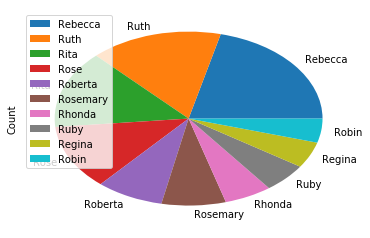

In [267]:
fromR.groupby('Name').sum().sort_values(by='Count', ascending=False).plot.pie(y='Count')

In [268]:
def combine_names(fromYear, toYear):
    combined = pd.DataFrame()
    cols = ['Name','Gender','Count']
    for year in range(fromYear, toYear + 1):
        year_to_add = pd.read_csv(names_path + str(year) + '.txt', names=cols)
        if combined.empty:
            combined = year_to_add
        else:
            combined = pd.concat([combined, year_to_add]).groupby(['Name', 'Gender'], as_index=False)["Count"].sum()
    consonants = list("bcdfghjklmnpqrstvwxzBCDFGHJKLMNPQRSTVWXZ")
    combined['Length']=combined.apply(lambda row: sum(row['Name'].count(c) for c in consonants), axis=1)
    combined = combined.sort_values(by='Count', ascending=False)
    return combined

In [269]:
data = combine_names(1900, 2000)
example = data.head(10)
example

,Name,Gender,Count,Length
31140,James,M,4788204,3
34372,John,M,4719578,3
60261,Robert,M,4619315,4
50703,Michael,M,4002679,4
49004,Mary,F,3839492,2
76240,William,M,3640610,4
17004,David,M,3338900,3
59901,Richard,M,2483752,5
35011,Joseph,M,2279883,4
12150,Charles,M,2177977,5


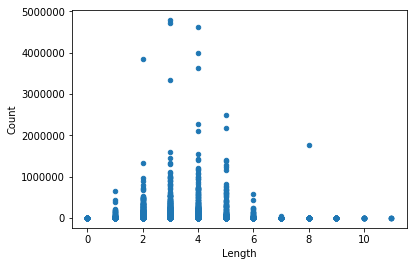

In [270]:
data.plot.scatter(x='Length', y="Count")